# EMPLOYEE ATTRITION : HR ANALYTICS

 One of the crucial roles of the HR Dept is to minimize the employee attrition rate i.e. preventing the reduction of staff(voluntary resigning or laid off by the company). If the HR dept is unable to do so,

- The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners

- A sizeable department has to be maintained, for the purposes of recruiting new talent

- More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company

A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market.

The management of the company has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition. In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away.

Playing the role of a Lead Data Analyst in the firm, this project has been assigned to me.
Join me as I tread on this journey of exploration and attempt to figure out the main causes behind the attrition rate of company XYZ.





In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [3]:
#Importing the Employee Survey Data 
df1=pd.read_csv('employee_survey_data.csv')
print(df1.columns)
df1.head()


Index(['EmployeeID', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance'],
      dtype='object')


,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [4]:
#Importing the Employee General Data 
df2=pd.read_csv('general_data.csv')
print(df2.columns)
df2.head()

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [5]:
#Importing the Manager Survey Data
df3=pd.read_csv('manager_survey_data.csv')
print(df3.columns)
df3.head()

Index(['EmployeeID', 'JobInvolvement', 'PerformanceRating'], dtype='object')


,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [6]:
df=df1.merge(df2,on='EmployeeID',how='inner')

In [7]:
#Creating a master dataset by merging all 3 datasets
df=df.merge(df3,on='EmployeeID',how='inner')
df.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,...,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating
0,1,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,...,11,8,0,1.0,6,1,0,0,3,3
1,2,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,...,23,8,1,6.0,3,5,1,4,2,4
2,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,...,15,8,3,5.0,2,5,0,3,3,3
3,4,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,...,11,8,3,13.0,5,8,7,5,2,3
4,5,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,...,12,8,2,9.0,2,6,0,4,3,3


In [8]:
#Finding out about the data types and null values present in the dataset across columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 29 columns):
EmployeeID                 4410 non-null int64
EnvironmentSatisfaction    4385 non-null float64
JobSatisfaction            4390 non-null float64
WorkLifeBalance            4372 non-null float64
Age                        4410 non-null int64
Attrition                  4410 non-null object
BusinessTravel             4410 non-null object
Department                 4410 non-null object
DistanceFromHome           4410 non-null int64
Education                  4410 non-null int64
EducationField             4410 non-null object
EmployeeCount              4410 non-null int64
Gender                     4410 non-null object
JobLevel                   4410 non-null int64
JobRole                    4410 non-null object
MaritalStatus              4410 non-null object
MonthlyIncome              4410 non-null int64
NumCompaniesWorked         4391 non-null float64
Over18                     4410 

We know that the average number of employees at XYZ are approximately 4000. Using this, we can find out the attrition rate of the company.

In [46]:
atrate=len(df[df['Attrition']=='Yes'])/4000
print('Attrition Rate: ',atrate*100,'%')

Attrition Rate:  17.775 %


The attrition rate of the company XYZ (<b><i>17.78%</i></b>) is very high considering the ideal attrition rate is <b><i>10%</i></b> and it is also significantly higher than the global average of <b><i>11.2%</i></b>. Thus we have to dive deep and look at the underlying issues

First and foremost lets try to understand the demographics of our company 

We can see a dip in the age distibution as we move onto employees of greater age when looking at Ex-Employees with respect to the overall comapany. Hence, let's further look into the demographics

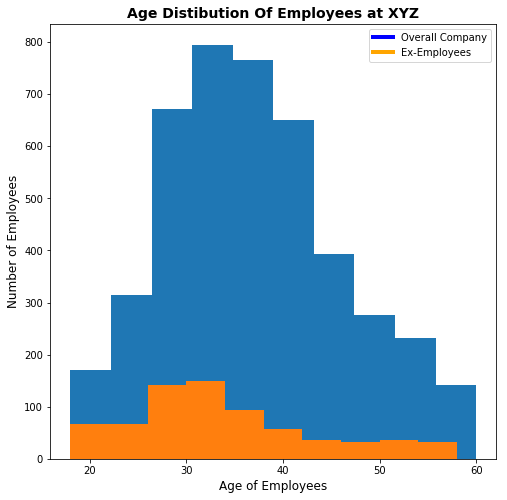

In [41]:
#Plotting the Age Distribution of the Employees for overall company and those who left
plt.figure(figsize=[8,8])
#Overall Company
plt.hist(x=df['Age'])
#Those who left
plt.hist(x=df[df['Attrition']=='Yes']['Age']);
#Legend Elements
legend_elements = [Line2D([0], [0], color='b', lw=4, label='Overall Company'),
                   Line2D([0], [0], lw=4, color='orange', label='Ex-Employees')]
plt.legend(handles=legend_elements, loc='best');
#Polishing The Graph
plt.title('Age Distibution Of Employees at XYZ',size=14,fontweight='bold');
plt.ylabel('Number of Employees',size=12);
plt.xlabel('Age of Employees',size=12);

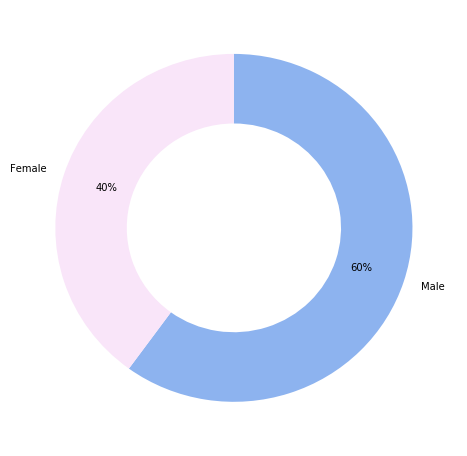

In [12]:
#Creating a pie plot to visualize the gender distribution
plt.figure(figsize=[8,8])
src=df.Gender.value_counts()
plt.pie(src,labels=src.index,startangle=90,counterclock=False,colors=['#8db3ef','#f9e5f9'],wedgeprops={'width':0.4},autopct='%1.0f%%', pctdistance=0.75);

There is a difference of 20% between Males and Females

In [13]:
df.columns

Index(['EmployeeID', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')

In [14]:
#Removing Redundant columns which have same value throughout
df.drop(['Over18','EmployeeCount','StandardHours'],axis=1,inplace=True)

In [15]:
df.columns

Index(['EmployeeID', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'JobInvolvement', 'PerformanceRating'],
      dtype='object')

In [17]:
#Creating a Function to seperate employees into their corresponding genration
def Gen(row):
    if row['Age']<=37:
        row['Gen']='Millenials'
        return 'Millenials'
    elif ((row['Age']>37)&(row['Age']<=54)):
        row['Gen']='Generation X'
        return 'Generation X'
    elif ((row['Age']>54)&(row['Age']<74)):
        row['Gen']='Boomers'
        return 'Boomers'
    else:
        row['Gen']='Silent'
        return 'Silent'
df['Gen']=''

In [18]:
#Applying the function
df['Gen']=df.apply(Gen,axis=1)

In [19]:
df.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,...,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,Gen
0,1,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,...,11,0,1.0,6,1,0,0,3,3,Generation X
1,2,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,...,23,1,6.0,3,5,1,4,2,4,Millenials
2,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,...,15,3,5.0,2,5,0,3,3,3,Millenials
3,4,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,...,11,3,13.0,5,8,7,5,2,3,Generation X
4,5,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,...,12,2,9.0,2,6,0,4,3,3,Millenials


Often every now and then, under the esteemed columns of our newspapers, we get to read about how millenials are picky about minute aspects of the company and shuffle around alot.

It would only make sense for us to look into this claim and see how Exposure to other work culture of other companies influences the retention of a Employee at XYZ

We can see that the claims of the newspapers seem to be very untrue in this case as the average of companies worked at increases gradually as the Generation gets older

Also, We can see that the employees who have left the company within the last 1 year were exposed to the work culture of many other companies across all age distributions. Perhaps they might not like the work culture here. Lets try to understand why.

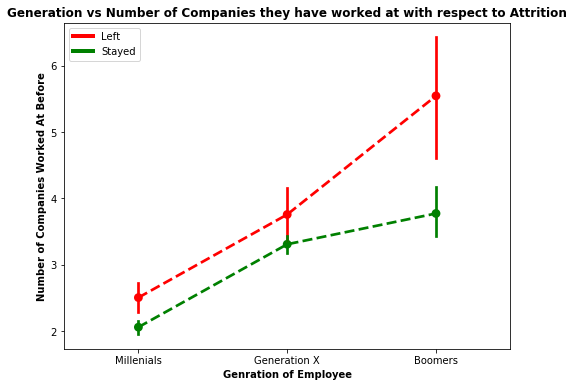

In [42]:
#Visualising the number of companies each genration has worked for with respect to their current status in the company
plt.figure(figsize=[8,6])
#Those Who Left
sns.pointplot(data=df[df['Attrition']=='Yes'],x='Gen',y='NumCompaniesWorked',order=['Millenials','Generation X','Boomers'],color='Red',linestyles=["--"]);
#Those who did not leave
sns.pointplot(data=df[df['Attrition']=='No'],x='Gen',y='NumCompaniesWorked',order=['Millenials','Generation X','Boomers'],color='Green',linestyles=["--"]);
legend_elements = [Line2D([0], [0], color='r', lw=4, label='Left'),
                   Line2D([0], [0], lw=4, color='g', label='Stayed')]
#Polishing the graph
plt.legend(handles=legend_elements, loc='best')
plt.xlabel('Genration of Employee',fontweight='bold')
plt.ylabel('Number of Companies Worked At Before',fontweight='bold')
plt.title('Generation vs Number of Companies they have worked at with respect to Attrition',fontweight='bold',size=12);

In [21]:
#Creating a function to elaborate on the education levels with help of values given in the data dictionary
def Edu(row):
    if row['Education']==1:
        row['Education']='Without College Degree'
        return 'Without College Degree'
    elif (row['Education']==2):
        row['Education']='College'
        return 'College'
    elif (row['Education']==3):
        row['Education']='Bachelor'
        return 'Bachelor'
    elif (row['Education']==4):
        row['Education']='Master'
        return 'Master'
    else:
        row['Education']='Doctor'
        return 'Doctor'

In [22]:
#Applying function
df['Education']=df.apply(Edu,axis=1)

Lets try to understand the distribution of employees across the departments.

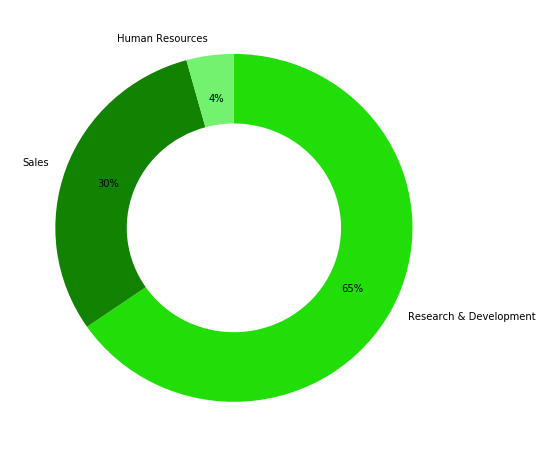

In [27]:
#Understanding the Department-wise distribution
plt.figure(figsize=[8,8])
src=df.Department.value_counts()
plt.pie(src,labels=src.index,startangle=90,counterclock=False,colors=['#21dd08','#118202','#73f26f'],wedgeprops={'width':0.4},autopct='%1.0f%%', pctdistance=0.75);

As we can see, 

The Research & Development Department constitutes the major part of the company (<b>65%</b>) where as the HR department only constitutes <b>4%</b> of the total distribution.
Even though the HR department is smallest part of the company, nearly 30% of it's department has left in the previous year. This is ironic given that the HR department itself is responsible for maintaining and assessing the attrition rate. The HR department is also responsible of maintaining the work culture of the company in many case

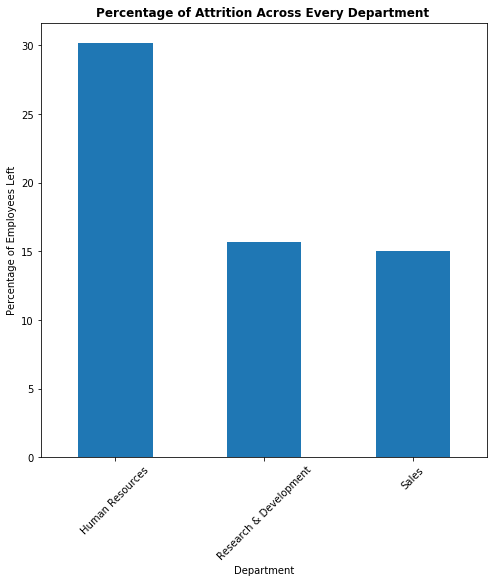

In [43]:
#Plotting the percentage of attrition across dept
plt.figure(figsize=[8,8])
x=df.groupby(['Department']).Attrition.count()
y=df[df['Attrition']=='Yes'].groupby(['Department']).Age.count()
#Calculated Percentage
z=(y/x)*100
#Plotting it
z.plot(kind='bar',color=[sns.color_palette()[0]]);
#Polishing
plt.xlabel('Department',size=10);
plt.ylabel('Percentage of Employees Left');
plt.title('Percentage of Attrition Across Every Department ',fontweight='bold');
plt.xticks(rotation=45);

We can see that across all departments, employees who have left have had lesser income as compared to the rest in their department and also Human Resources has the least average income which can also be contributing to such a high rate of attrition in the department

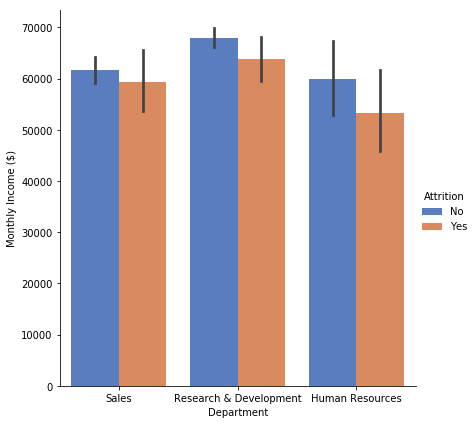

In [45]:
#plotting the salaries accross department 
g = sns.catplot(x="Department", y="MonthlyIncome", hue="Attrition", data=df,
                height=6, kind="bar", palette="muted")
#Polishing 
plt.ylabel('Monthly Income ($)');

In [31]:
#Creating a function to classify the employee according to the number of years they have been serving under the same manager
def Curr(row):
    if row['YearsWithCurrManager']<2:
        row['Curr']='Fresh Manager'
        return 'Fresh Manager'
    elif ((row['YearsWithCurrManager']>=2)&(row['YearsWithCurrManager']<=4)):
        row['Curr']='2-4 Years'
        return '2-4 Years'
    elif ((row['YearsWithCurrManager']>4)):
        row['Curr']='Old Manager'
        return 'Old Manager'
    
df['Curr']=df.apply(Curr,axis=1)

In [32]:
#Creating the Order via transforming it into a Categorical Datatype
order=['Fresh Manager','2-4 Years','Old Manager']
order=pd.api.types.CategoricalDtype(ordered=True,categories=order)
df['Curr']=df['Curr'].astype(order)

We can see that as the Employees have the same Manager for years and years on, their Job Satisfaction gradually decreases. This follows the same trend for those who left at a greater scale

Text(-51.95,0.5,'Years under Same Manager')

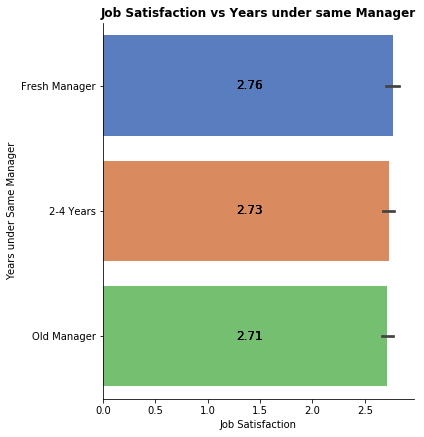

In [40]:
#Plotting the Job Satisfaction of employees under varying years served under the same manager
g = sns.catplot(x="JobSatisfaction", y="Curr" ,data=df,height=6, kind="bar", palette="muted")
ax = plt.gca()
#polishing
#Adding the values inside the bars
for p in ax.patches:
    
    ax.text(1.4 , p.get_height()-0.75, '2.76', 
            fontsize=12, color='Black', ha='center', va='bottom')
    ax.text(1.4 , p.get_height()+0.25, '2.73', 
            fontsize=12, color='Black', ha='center', va='bottom')
    ax.text(1.4 , p.get_height()+1.25, '2.71', 
            fontsize=12, color='Black', ha='center', va='bottom')
plt.title('Job Satisfaction vs Years under same Manager',fontweight="bold")
plt.xlabel('Job Satisfaction')
plt.ylabel('Years under Same Manager')

Many of the employees of leave are those who work for 1 or less years. This might be because many employees leave for higher education but need a work experience or they might leave instantly because the work culture might not suit them.

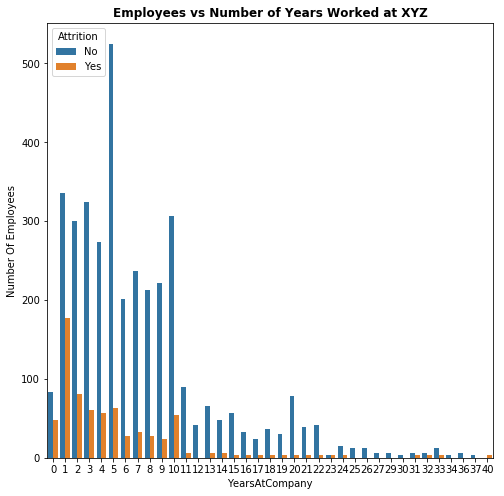

In [48]:
#plotting the attrition accross employees varying with the number of years they have served at the company
plt.figure(figsize=[8,8])
g = sns.countplot(x="YearsAtCompany",hue='Attrition',data=df);
plt.ylabel('Number Of Employees');
plt.title('Employees vs Number of Years Worked at XYZ',fontweight='bold');

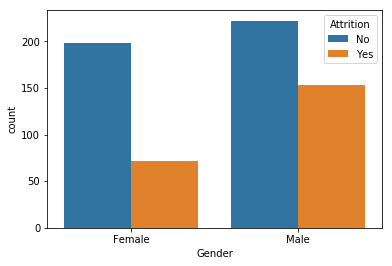

In [49]:
#Understanding the gender distribution of employees who left early
x=df[df['YearsAtCompany']<=1]
sns.countplot(data=x,x='Gender',hue='Attrition');

# Conclusions
- Major Changes Have to be Made in the HR Department. 
- Wages to be increased for the HR department
- Employees should not be working under the same manager for more than 4 years given that he/she is not being promoted
- Employees who have worked at lesser companies should be preferred while hiring regardless of age
- Focus on keeping the young population satisfied since the willingness to leave the company decreases with age